# importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
import cv2 as cv
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import  Input , Dense ,Conv2D , MaxPooling2D ,RandomTranslation , RandomFlip , RandomRotation,RandomZoom ,BatchNormalization ,Flatten , Rescaling , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# images path

In [9]:
cclss = os.listdir("./archive/Breast Cancer/train")
cclss

['breast_benign', 'breast_malignant']

In [11]:
X_train = []
y_train = []
for cls in cclss:
  path = f"archive/Breast Cancer/train/{cls}"
  img_name = os.listdir(path)
  for cl in img_name:
      img_path = f"{path}/{cl}"
      img = plt.imread(img_path)
      X_train.append(img)
      y_train.append(cls)
      

In [13]:
x_test = []
y_test = []
for cls in cclss:
  path = f"archive/Breast Cancer/test/{cls}"
  img_name = os.listdir(path)
  for cl in img_name:
      img_path = f"{path}/{cl}"
      img = plt.imread(img_path)
      x_test.append(img)
      y_test.append(cls)

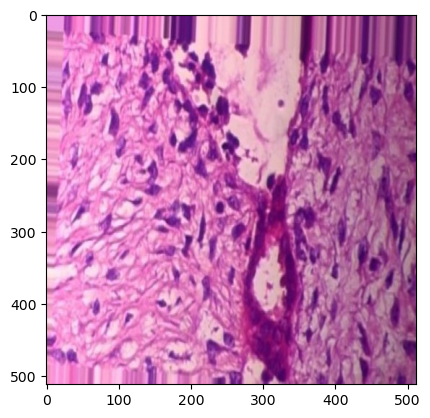

In [14]:
plt.imshow(X_train[0])

In [15]:
y_train[0]

'breast_benign'

# Resizing Images

In [16]:
X_train = np.array([cv.resize(img, (28, 28)) for img in X_train])
X_test = np.array([cv.resize(img, (28, 28)) for img in x_test])

In [17]:
np.shape(X_train)

(7000, 28, 28, 3)

# Splititg Data

In [18]:
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=.1 , shuffle=True)

# Scaling Images

In [19]:
X_train = X_train /255
X_test = X_test /255
X_val = X_val /255

# Data Encoding

In [21]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

# Define Input Shape for Input Layer

In [22]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 3)

# Building Model

In [23]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=((input_shape))),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dropout(rate=0.5),
    Dense(units=1, activation='sigmoid'),
])

In [24]:
model.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
                  optimizer=Adam(learning_rate=0.0001))

# Training the Model

In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size = 32 ,  validation_data=[X_val, y_val])

Epoch 1/100
197/197 [==============================] - 7s 19ms/step - loss: 0.3593 - accuracy: 0.9452 - val_loss: 0.3031 - val_accuracy: 1.0000
Epoch 2/100
197/197 [==============================] - 4s 19ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 3/100
197/197 [==============================] - 4s 19ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/100
197/197 [==============================] - 4s 19ms/step - loss: 9.2776e-04 - accuracy: 1.0000 - val_loss: 5.5840e-04 - val_accuracy: 1.0000
Epoch 5/100
197/197 [==============================] - 4s 20ms/step - loss: 4.7472e-04 - accuracy: 1.0000 - val_loss: 2.5909e-04 - val_accuracy: 1.0000
Epoch 6/100
197/197 [==============================] - 4s 20ms/step - loss: 3.5010e-04 - accuracy: 1.0000 - val_loss: 1.5887e-04 - val_accuracy: 1.0000
Epoch 7/100
197/197 [==============================] - 4s 22ms/step - loss: 1.8628e-04 - accuracy: 1.0000 - val_

# Chick Model Loss

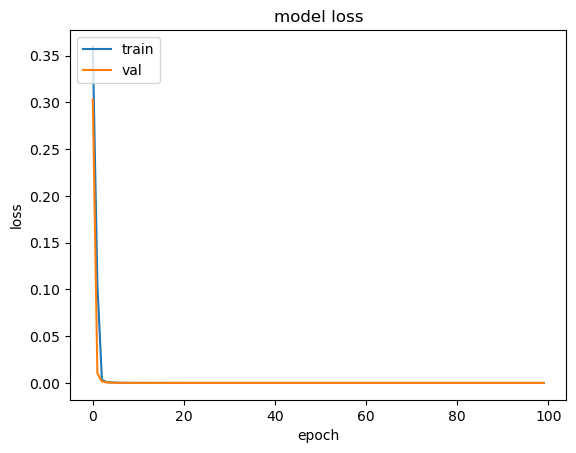

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Chikc Model Accuracy

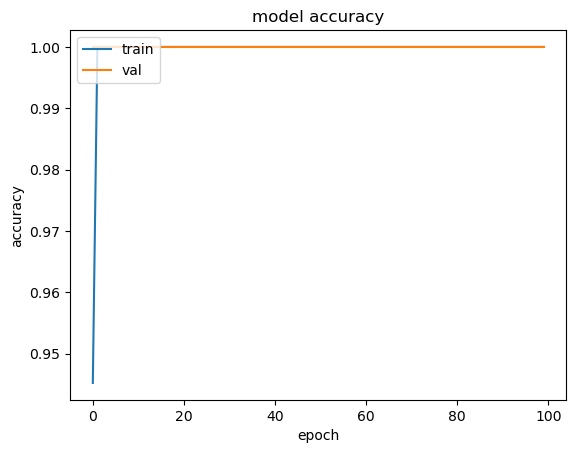

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate The Model

In [28]:
model.evaluate(X_train , y_train)

197/197 [==============================] - 1s 7ms/step - loss: 5.2464e-12 - accuracy: 1.0000


[5.246390995250483e-12, 1.0]

In [29]:
model.evaluate(X_test , y_test)

47/47 [==============================] - 0s 6ms/step - loss: 5.2351e-12 - accuracy: 1.0000


[5.2351217978696685e-12, 1.0]

# Saving Model

In [30]:
model.save("breast_canser.h5")

In [31]:
model.save("breast_canser.keras")